In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

plt.rcParams["figure.dpi"] = 120

rng = np.random.RandomState(1)



In [12]:
faces = fetch_lfw_people(min_faces_per_person=30)
print(faces.target_names)

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Colin Powell' 'David Beckham' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Guillermo Coria' 'Hans Blix' 'Hugo Chavez' 'Jacques Chirac'
 'Jean Chretien' 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Megawati Sukarnoputri' 'Nestor Kirchner'
 'Recep Tayyip Erdogan' 'Roh Moo-hyun' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


In [36]:
print(faces.images.shape)
print(faces.target.shape)
print(faces.target[:10])

(2370, 62, 47)
(2370,)
[ 8  4 21  8  8 25  4 22  5 22]


In [38]:
print(len(faces.target_names))

34


[133, 154, 255, 308, 411, 467, 516, 612, 632, 685, 732, 762, 785, 833, 916, 995, 1014, 1068, 1103, 1124, 1205, 1238, 1264, 1281, 1405, 1454, 1458, 1506, 1546, 1987, 2123, 2157, 2282]


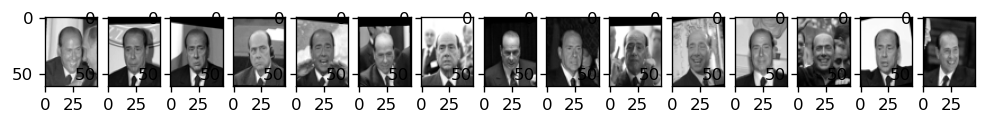

In [53]:
berlusconi_indeces = [ i for i, v in enumerate(faces.target) if v == 29 ]
print(berlusconi_indeces)

berlusconi_indeces = berlusconi_indeces[:15]

fig, axes = plt.subplots(1, len(berlusconi_indeces), figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[berlusconi_indeces[i]], cmap="binary_r")

In [54]:
pca = PCA(150)
pca.fit(faces.data)



PCA(n_components=150)

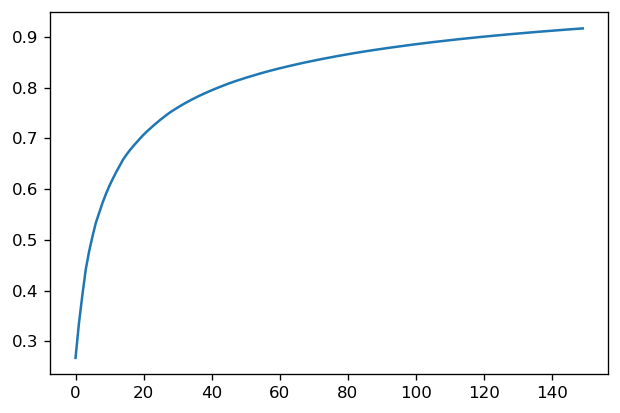

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [57]:
pca.fit(faces.data)
components = pca.transform(faces.data)
reconstructions = pca.inverse_transform(components)

Text(0, 0.5, 'Immagini ricostruite dopo PCA 150')

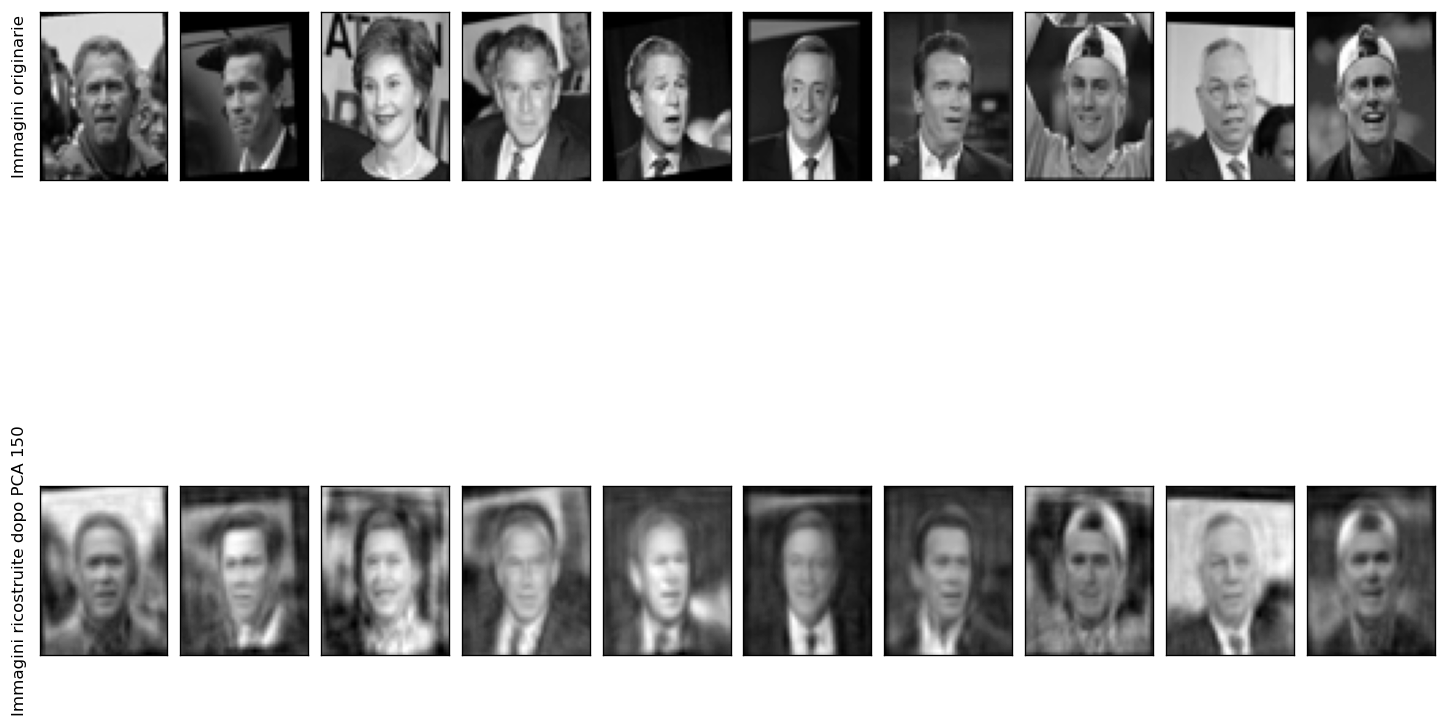

In [62]:
fig, ax = plt.subplots(
    2, 10, 
    figsize=(15, 10),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={
        "hspace": 0.1,
        "wspace": 0.1
    }
)

for i in range(0, 10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap="binary_r")
    ax[1, i].imshow(reconstructions[i].reshape(62, 47), cmap="binary_r")
    
    
ax[0, 0].set_ylabel("Immagini originarie")
ax[1, 0].set_ylabel("Immagini ricostruite dopo PCA 150")